#### 读取波形信息

In [1]:
import scipy.io as sio
data=sio.loadmat('spikewave.mat')
spike_data=data['wave']
print(spike_data.shape)

(40, 5376)


#### 将所有波形叠画在一起

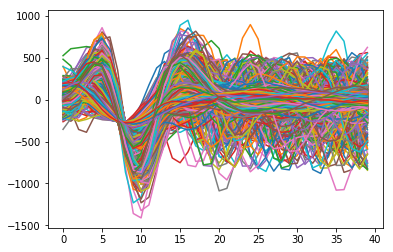

In [4]:
import numpy as np
import matplotlib.pyplot as plt
spike_data=np.transpose(spike_data)
for i in range(5376):
    plt.plot(spike_data[i])
plt.show()

由图发现，在第20个采样点前，部分spike波形存在明显的两个波峰和一个波谷，而另外一些较为平缓，存在一定的可分性

## 降到2维空间

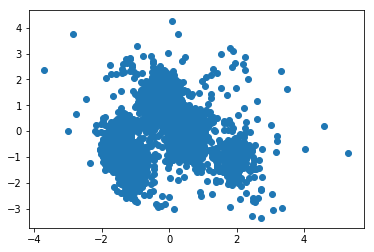

In [5]:
from sklearn.decomposition import PCA
n_components=2
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(spike_data)
data_2d=pca.transform(spike_data)
plt.scatter(data_2d[:,0],data_2d[:,1])
plt.show()

#### 2维空间聚类

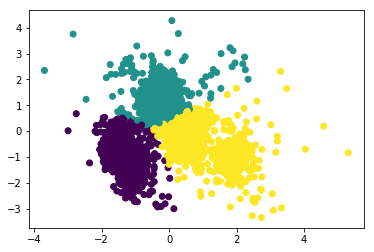

In [21]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(data_2d)
data_2d_label=model.predict(data_2d)
plt.scatter(data_2d[:,0],data_2d[:,1],c=data_2d_label)
plt.show()

#### 聚类后再次叠画

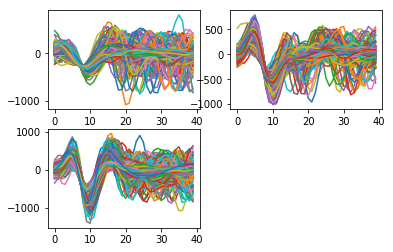

In [22]:
plt.figure()
plt.subplot(2,2,1)
for i in range(5376):
    if(data_2d_label[i]==0):
        plt.plot(spike_data[i])
plt.subplot(2,2,2)
for i in range(5376):
    if(data_2d_label[i]==1):
        plt.plot(spike_data[i])

plt.subplot(2,2,3)
for i in range(5376):
    if(data_2d_label[i]==2):
        plt.plot(spike_data[i])
#plt.subplot(2,2,4)
#for i in range(5376):
#    if(data_2d_label[i]==3):
#        plt.plot(spike_data[i])

分别尝试聚类为4、3、2类，最后发现聚成3类后叠画的波形即为理想，但第一个波形分开较为明显，第2、3不排除过拟合的可能。
第一类明显在20采样点之前存在两个小峰和一个小谷，第二类在20采样点前存在一个大峰一个大谷和一个小峰，第三类存在两个大峰和一个大谷。
类内在20采样点之前有如上规律，20采样点之后各spike基本随机分布。

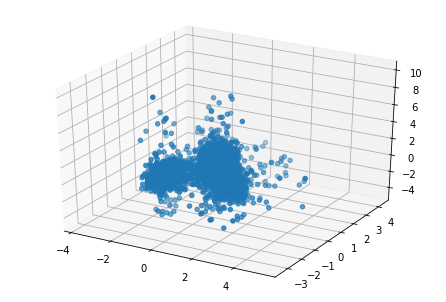

In [14]:
from mpl_toolkits.mplot3d import Axes3D
n_components=3
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(spike_data)
data_3d=pca.transform(spike_data)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2])
plt.show()

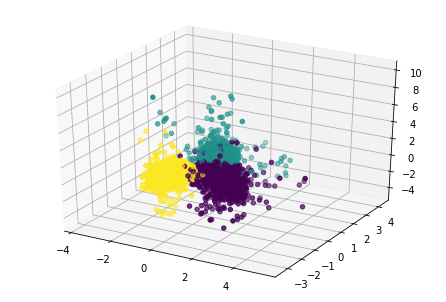

In [19]:
model=KMeans(n_clusters=3)
model.fit(data_3d)
data_3d_label=model.predict(data_3d)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2],c=data_3d_label)
plt.show()

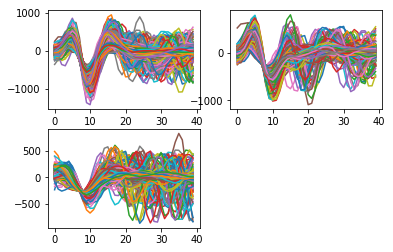

In [20]:
plt.figure()
plt.subplot(2,2,1)
for i in range(5376):
    if(data_3d_label[i]==0):
        plt.plot(spike_data[i])
plt.subplot(2,2,2)
for i in range(5376):
    if(data_3d_label[i]==1):
        plt.plot(spike_data[i])
plt.subplot(2,2,3)
for i in range(5376):
    if(data_3d_label[i]==2):
        plt.plot(spike_data[i])

分析与2维基本一致，但在第一类和第二类（2维的第二类和第三类）的区分上与二维还是有较明显差异。也同样说明的该两类可能存在过拟合的问题，可能实际上是一类。